In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNC

In [3]:
zoo = pd.read_csv('zoo.csv')

In [8]:
zoo
zoo_features = zoo.iloc[:,1:]

In [9]:
zoo_features.shape

(101, 17)

In [10]:
zoo_features.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [12]:
zoo_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [14]:
train, test = train_test_split(zoo_features, test_size = 0.3, random_state = 2)

In [22]:
#to find best k value

acc=[]
for i in range(3,50,2):
    knn = KNC(n_neighbors=i)
    knn.fit(train.iloc[:,0:16],train.iloc[:,16])
    train_acc = np.mean(knn.predict(train.iloc[:,0:16]) == train.iloc[:,16])
    test_acc = np.mean(knn.predict(test.iloc[:,0:16]) == test.iloc[:,16])
    acc.append([train_acc,test_acc])

In [23]:
acc

[[0.9714285714285714, 0.9354838709677419],
 [0.8714285714285714, 0.8709677419354839],
 [0.8142857142857143, 0.8064516129032258],
 [0.8, 0.7741935483870968],
 [0.8, 0.7741935483870968],
 [0.8, 0.7419354838709677],
 [0.8, 0.7419354838709677],
 [0.8, 0.7419354838709677],
 [0.7428571428571429, 0.7419354838709677],
 [0.7142857142857143, 0.6774193548387096],
 [0.7142857142857143, 0.6774193548387096],
 [0.7142857142857143, 0.6774193548387096],
 [0.7142857142857143, 0.6774193548387096],
 [0.7142857142857143, 0.6774193548387096],
 [0.5714285714285714, 0.6129032258064516],
 [0.5285714285714286, 0.5483870967741935],
 [0.4857142857142857, 0.45161290322580644],
 [0.42857142857142855, 0.41935483870967744],
 [0.45714285714285713, 0.45161290322580644],
 [0.45714285714285713, 0.45161290322580644],
 [0.4142857142857143, 0.3870967741935484],
 [0.4142857142857143, 0.3870967741935484],
 [0.4142857142857143, 0.3870967741935484],
 [0.4142857142857143, 0.3870967741935484]]

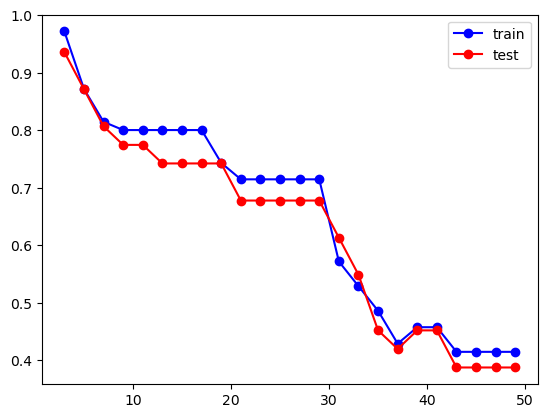

In [24]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc],'bo-')
plt.plot(np.arange(3,50,2),[i[1] for i in acc],'ro-')
plt.legend(['train','test'])

In [30]:
#from plots atk = 3 we get best model

#model building at k = 3

knn = KNC(n_neighbors = 3)
knn.fit(train.iloc[:,0:16],train.iloc[:,16])
train_acc=np.mean(knn.predict(train.iloc[:,0:16])==train.iloc[:,16])
test_acc=np.mean(knn.predict(test.iloc[:,0:16])==test.iloc[:,16])
train_acc
test_acc

0.9354838709677419